# Planteamiento del problema

Una empresa del sector farmacéutico desea utilizar la información que posee de sus
empleados para estimar el nivel de satisfacción laboral que puedan tener en algún
momento y usarlo como insumo para detectar posibles fugas de personal. El CEO de la
farmacéutica le ha pedido a su equipo de científicos de datos que construyan un modelo
para tal fin y le proporcionen un conjunto de estrategias que permitan aumentar el nivel
de satisfacción laboral de sus empleados y evitar futuras fugas de personal.

# 0. Importación de Librerías.

In [3]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 173 kB/s
     |████████████████████████████████| 102 kB 8.7 MB/s 
     |████████████████████████████████| 690 kB 58.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 9.9 MB 52.9 MB/s 
     |████████████████████████████████| 4.7 MB 45.9 MB/s 
     |████████████████████████████████| 296 kB 68.1 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315268 sha256=b51a84e504ba85e27e27b2e3674ebdad873be1db578abe905629963f47b647dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-za08c00p/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3f9c426527dac2e56d00dea879b31152ccf87f79636c3201a943546a69351b3c
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [153]:
#Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from pandas_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.decomposition import PCA

#Librerías extras
import itertools
import pylev

# 1. Entendimiento del Negocio

|     Field                       |     Description                                                |
|---------------------------------|----------------------------------------------------------------|
|     Age                         |     Age of the employee                                        |
|     Attrition                   |     employee attrition                                         |
|     BusinessTravel              |     how frequently an employee travels for business purpose    |
|     DailyRate                   |     Daily wage of an employee                                  |
|     Department                  |     Employee department                                        |
|     DistanceFromHome            |     Distance from home to office in KM's                       |
|     Education                   |     Qualification of employee (masked, higher is better)       |
|     EducationField              |     Stream of Education                                        |
|     EmployeeCount               |     EmployeeCount                                              |
|     EmployeeNumber              |     employee number                                            |
|     EnvironmentSatisfaction     |     Environment    (higher is better)                          |
|     Gender                      |     Gender of employee                                         |
|     HourlyRate                  |     employee hourly rate                                       |
|     JobInvolvement              |     Job involvement (higher is better)                         |
|     JobLevel                    |     level of Job (higher is more important)                    |
|     JobRole                     |     job role of an employee                                    |
|     JobSatisfaction             |     if employee is satisfied?                                  |
|     MaritalStatus               |     employee is married or not                                 |
|     MonthlyIncome               |     income of an employee                                      |
|     MonthlyRate                 |     monthly rate of an employee                                |
|     NumCompaniesWorked          |     number of companies worked for                             |
|     Over18                      |     age over 18                                                |
|     OverTime                    |     employee works over time                                   |
|     PercentSalaryHike           |     salary hike                                                |
|     PerformanceRating           |     performance rate                                           |
|     RelationshipSatisfaction    |     Relationship satisfaction                                  |
|     StandardHours               |     per week standard work hours                               |
|     StockOptionLevel            |     company stock option level                                 |
|     TotalWorkingYears           |     total working years                                        |
|     TrainingTimesLastYears      |     Training time                                              |
|     WorkLifeBalance             |     Work life balance                                          |
|     YearsAtCompany              |     total years at current company                             |
|     YearsInCurrentRole          |     total years in current role                                |
|     YearsSinceLastPromotion     |     years since last promotion                                 |
|     YearsWithCurrManager        |     Years worked under current manager                         |

In [7]:
url = 'https://raw.githubusercontent.com/a-garcia13/Taller-3-Ciencia-de-Datos/main/Data/Data_Taller_3.csv'

data = pd.read_csv(url, sep=";")
data.head()

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NewEmployee
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,80.0,0,8,0,1,6,4,0,5,0
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,80.0,1,10,3,3,10,7,1,7,0
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,80.0,0,7,3,3,0,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,80.0,0,8,3,3,8,7,3,0,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,80.0,1,6,3,3,2,2,2,2,0


In [8]:
data.shape

(1506, 36)

In [9]:
data.dtypes

JobSatisfaction             float64
Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel            

## 1. Limpieza y preparación de los datos:

In [10]:
ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

Tareas a realizar
1. Separar JobStatisfaction a predecir del Dataset de entrenamiento
2. En Age, completar los datos faltantes y Corrregir Outliers
3. En Attrition, completar el dato vacio
4. Eliminar Employee count ya que es una columna constante, que solo tiene una entrada con valor distinto a 1
5. Eliminar EmployeeNumber ya que es una variable identificador
6. Arreglar las categorias de Gender
7. Arreglar las categorias de Marital Status
8. Revisar Monthly Income, ya que es probable que tenga datos mal, probablemente tenga relacion con HourlyRate, por lo que se pueda arreglar desde esta otra variable.
9. Eliminar Over18 ya que es una variable estatica
10. Eliminar StandardHours ya que es una variable estatica.
11. Estandarizar las categorias de EducationField
12. Estandarizar categorias de JobRole
13. YearsAtCompany tiene un valor muy extremo de 100 que hay que corregir

No hay datos duplicados

In [11]:
data = data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'NewEmployee'])
data.head(5)

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,4.0,41.0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,2.0,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,3.0,37.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,3.0,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


In [12]:
data["JobSatisfaction"].unique()

array([ 4.,  2.,  3.,  1., nan])

In [13]:
pred = data[data["JobSatisfaction"].isna() == True]
pred

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
15,NaN,29.0,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,2,...,3,3,1,10,1,3,10,9,8,8
69,NaN,36.0,Yes,Travel_Rarely,318,Research & Development,9,3,Medical,4,...,3,1,1,2,0,2,1,0,0,0
129,NaN,49.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,3,...,3,3,0,16,2,2,15,11,5,11
265,NaN,29.0,No,Travel_Rarely,1210,Sales,2,3,Medical,1,...,3,2,2,10,2,3,0,0,0,0
604,NaN,42.0,No,Travel_Rarely,933,Research & Development,29,3,Life Sciences,2,...,3,4,1,10,3,2,9,8,7,8
739,NaN,27.0,No,Travel_Rarely,1055,Research & Development,2,4,Life Sciences,1,...,3,2,1,4,2,3,3,2,2,2
844,NaN,30.0,No,Travel_Rarely,852,Sales,10,3,Marketing,3,...,3,1,1,10,3,3,10,3,1,4
887,NaN,42.0,No,Travel_Frequently,458,Research & Development,26,5,Medical,1,...,3,3,0,20,6,3,1,0,0,0
907,NaN,44.0,No,Travel_Rarely,1099,Sales,5,3,Marketing,2,...,3,3,1,26,5,3,22,9,3,10
990,NaN,33.0,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,2,...,3,1,0,8,2,4,5,4,1,2


In [14]:
data = data[data['JobSatisfaction'].isna() == False]

[Text(0, 0, '473'), Text(0, 0, '454'), Text(0, 0, '288'), Text(0, 0, '279')]

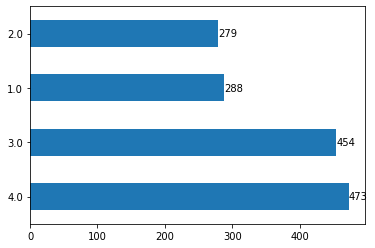

In [15]:
ax = data['JobSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

In [16]:
vacios = data[data["Age"].isna() == True]
vacios

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,2.0,NaN,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2
977,3.0,NaN,No,Non-Travel,999,Research & Development,26,1,Technical Degree,1,...,4,3,3,5,2,3,5,4,0,0
1340,3.0,NaN,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,2,...,3,1,1,10,4,3,10,9,1,7


* Estos valores de edad se completaran con el promedio, ya que es una variable cuantitativa en rango.

In [17]:
mean = data['Age'].mean()
mean

37.0784708249497

In [18]:
data.loc[data["Age"].isna() == True, "Age"] = mean

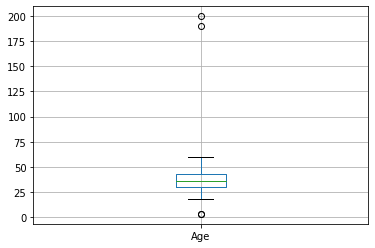

In [19]:
b_plot = data.boxplot(column = ["Age"]) 

Los Outliers tambien se cambiaran por la media

In [20]:
data.loc[data["Age"] > 100, "Age"] = mean
data.loc[data["Age"] < 18, "Age"] = mean

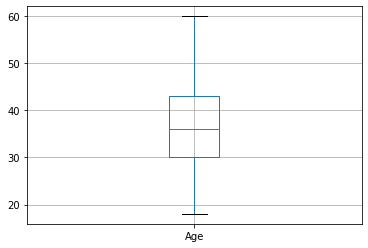

In [21]:
b_plot = data.boxplot(column = ["Age"]) 

In [22]:
vacios = data[data["Attrition"].isna() == True]
vacios

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1337,2.0,28.0,NaN,Travel_Rarely,1172,Sales,3,3,Med,2,...,3,4,1,1,3,3,1,0,0,0


In [23]:
data.loc[data["Attrition"].isna() == True, "Attrition"] = 'No'

[Text(0, 0, '1244'), Text(0, 0, '245'), Text(0, 0, '5')]

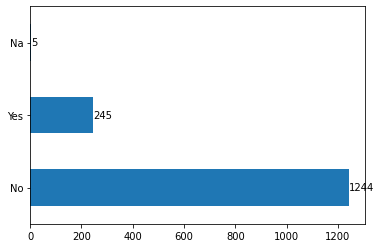

In [24]:
ax = data['Attrition'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

In [25]:
data["Gender"].unique()

array(['Fem', 'Male', 'man', 'Female', 'female'], dtype=object)

In [26]:
data.loc[data["Gender"] == 'Fem', "Gender"] = 'Female'
data.loc[data["Gender"] == 'man', "Gender"] = 'Male'
data.loc[data["Gender"] == 'female', "Gender"] = 'Female'

[Text(0, 0, '901'), Text(0, 0, '593')]

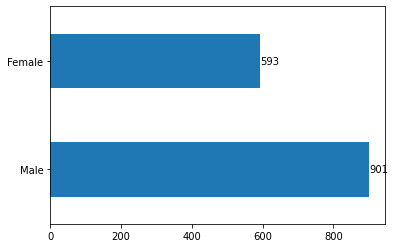

In [27]:
ax = data['Gender'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

In [28]:
data["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced', 'S', 'D', 'M'], dtype=object)

In [29]:
data.loc[data["MaritalStatus"] == 'S', "MaritalStatus"] = 'Single'
data.loc[data["MaritalStatus"] == 'D', "MaritalStatus"] = 'Divorced'
data.loc[data["MaritalStatus"] == 'M', "MaritalStatus"] = 'Married'

[Text(0, 0, '674'), Text(0, 0, '484'), Text(0, 0, '336')]

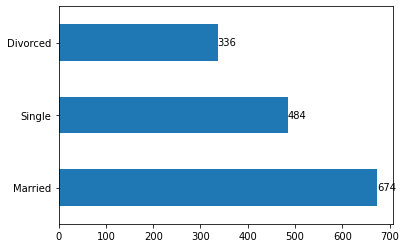

In [30]:
ax = data['MaritalStatus'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

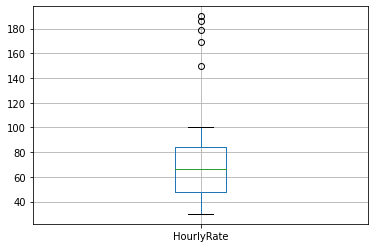

In [31]:
b_plot = data.boxplot(column = ["HourlyRate"]) 

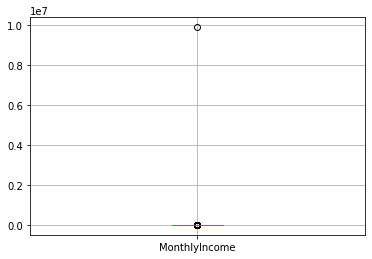

In [32]:
b_plot = data.boxplot(column = ["MonthlyIncome"]) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


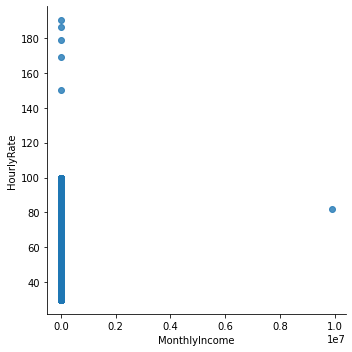

In [33]:
sns.lmplot('MonthlyIncome', 'HourlyRate', data=data, fit_reg=False)

plt.show()

In [34]:
outlier = data[data["MonthlyIncome"] > 20000]
outlier

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1326,2.0,32.0,Yes,Travel_Rarely,414,Sales,2,4,Marketing,3,...,3,3,0,7,3,2,2,2,2,2


In [35]:
median = data['MonthlyIncome'].median()
median

4872.5

In [36]:
data.loc[data["MonthlyIncome"] > 20000, "MonthlyIncome"] = median

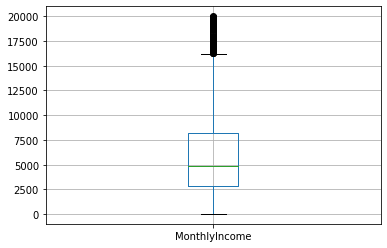

In [37]:
b_plot = data.boxplot(column = ["MonthlyIncome"]) 

In [38]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources', 'Med'], dtype=object)

In [39]:
data.loc[data["EducationField"] == 'Med', "EducationField"] = 'Medical'
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [40]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources',
       'Lab Tech', 'RH'], dtype=object)

In [41]:
data.loc[data["JobRole"] == 'Lab Tech', "JobRole"] = 'Laboratory Technician'
data.loc[data["JobRole"] == 'RH', "JobRole"] = 'Human Resources'
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [42]:
mean = data['YearsAtCompany'].mean()
mean

7.042838018741633

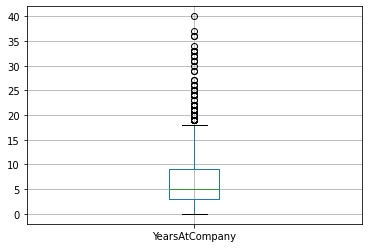

In [43]:
data.loc[data["YearsAtCompany"] > 60, "YearsAtCompany"] = mean
b_plot = data.boxplot(column = ["YearsAtCompany"]) 

# 2. Analisis Exploratorio

## 2.1 Variables Categoricas

#### 2.1.1 Variables Categoricas Cualitativas
Primero realizaremos un anailisis exploratorio para las variables categoricas cualitativas:
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- JobRole
- MaritalStatus
- OverTime

[Text(0, 0, '1244'), Text(0, 0, '245'), Text(0, 0, '5')]

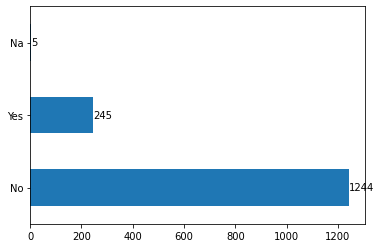

In [44]:
ax = data['Attrition'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '1059'), Text(0, 0, '281'), Text(0, 0, '154')]

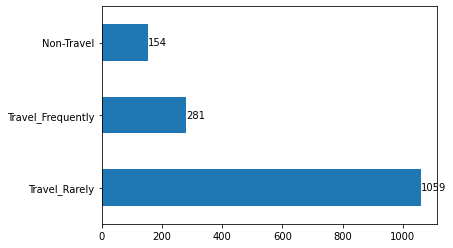

In [45]:
ax = data['BusinessTravel'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

In [46]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<AxesSubplot:title={'center':'Department'}, ylabel='Department'>

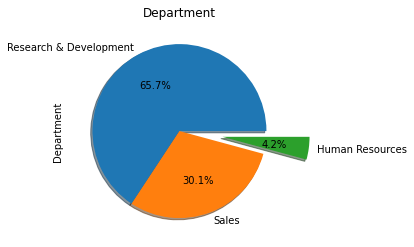

In [47]:
data['Department'].value_counts().plot.pie(y='', title="Department", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.5), shadow=True, startangle=0)

In [48]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

<AxesSubplot:title={'center':'EducationField'}, ylabel='EducationField'>

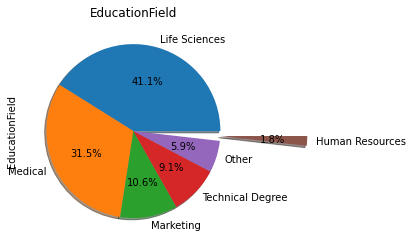

In [49]:
data['EducationField'].value_counts().plot.pie(y='', title="EducationField", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0, 0, 0, 1), shadow=True, startangle=0)

[Text(0, 0, '901'), Text(0, 0, '593')]

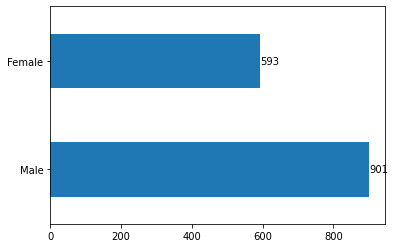

In [50]:
ax = data['Gender'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

In [51]:
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

<AxesSubplot:title={'center':'JobRole'}, ylabel='JobRole'>

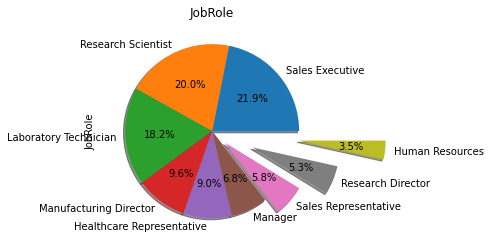

In [52]:
data['JobRole'].value_counts().plot.pie(y='', title="JobRole", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0, 0, 0, 0, 0.2, 0.5, 1), shadow=True, startangle=0)

In [53]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

<AxesSubplot:title={'center':'MaritalStatus'}, ylabel='MaritalStatus'>

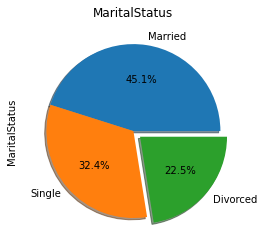

In [54]:
data['MaritalStatus'].value_counts().plot.pie(y='', title="MaritalStatus", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), shadow=True, startangle=0)

[Text(0, 0, '933'), Text(0, 0, '424'), Text(0, 0, '137')]

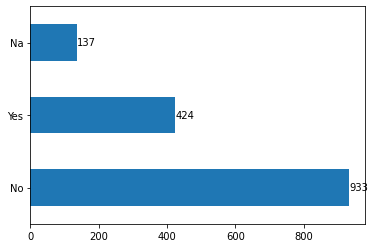

In [55]:
ax = data['OverTime'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

#### 2.1.2 Variables Categoricas Cuantitativas

Ahora realizaremos un anailisis exploratorio para las variables categoricas cuantitativas:
- JobSatisfaction
- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobLevel
- PerformanceRating
- RelationshipSatisfaction
- StockOptionLevel
- WorkLifeBalance

[Text(0, 0, '473'), Text(0, 0, '454'), Text(0, 0, '288'), Text(0, 0, '279')]

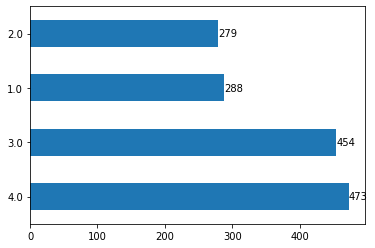

In [56]:
ax = data['JobSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '579'),
 Text(0, 0, '401'),
 Text(0, 0, '294'),
 Text(0, 0, '170'),
 Text(0, 0, '48'),
 Text(0, 0, '2')]

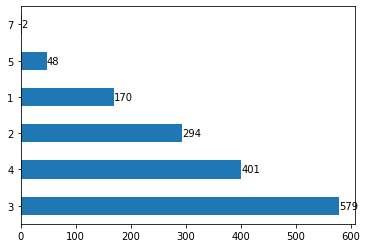

In [57]:
ax = data['Education'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '460'), Text(0, 0, '459'), Text(0, 0, '290'), Text(0, 0, '285')]

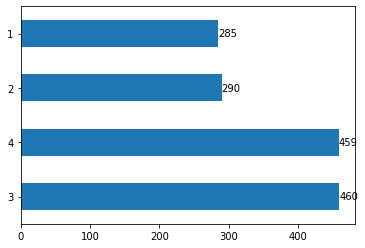

In [58]:
ax = data['EnvironmentSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '874'), Text(0, 0, '382'), Text(0, 0, '151'), Text(0, 0, '87')]

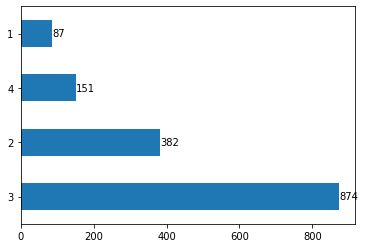

In [59]:
ax = data['JobInvolvement'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '563'),
 Text(0, 0, '537'),
 Text(0, 0, '218'),
 Text(0, 0, '107'),
 Text(0, 0, '69')]

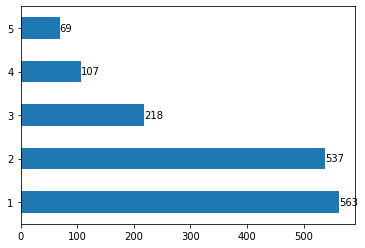

In [60]:
ax = data['JobLevel'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '1264'), Text(0, 0, '230')]

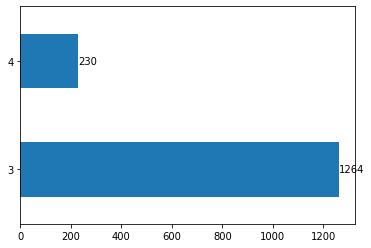

In [61]:
ax = data['PerformanceRating'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '464'), Text(0, 0, '441'), Text(0, 0, '310'), Text(0, 0, '279')]

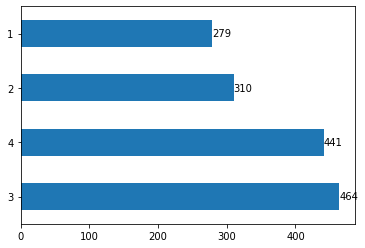

In [62]:
ax = data['RelationshipSatisfaction'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '647'), Text(0, 0, '600'), Text(0, 0, '161'), Text(0, 0, '86')]

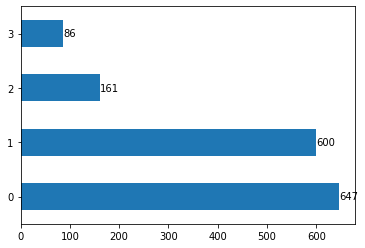

In [63]:
ax = data['StockOptionLevel'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

[Text(0, 0, '909'), Text(0, 0, '350'), Text(0, 0, '153'), Text(0, 0, '82')]

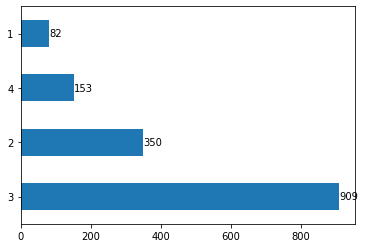

In [64]:
ax = data['WorkLifeBalance'].value_counts().plot.barh()
ax.bar_label(ax.containers[0])

## 2.2 Variables Cuantitativas - Continuas

Ahora realizaremos un anailisis exploratorio para las variables cuantitativas:
- Age
- DailyRate
- DistanceFromhome
- HourlyRate
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- PercentSalaryHike
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager                   

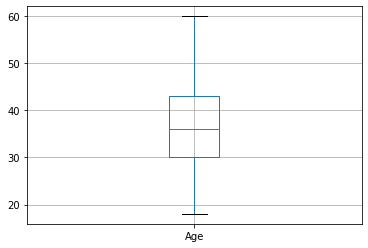

In [71]:
b_plot = data.boxplot(column = ['Age'])

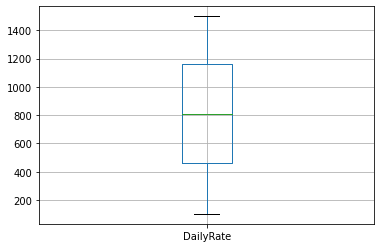

In [65]:
b_plot = data.boxplot(column = ['DailyRate']) 

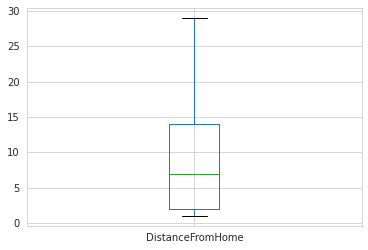

In [97]:
b_plot = data.boxplot(column = ['DistanceFromHome']) 

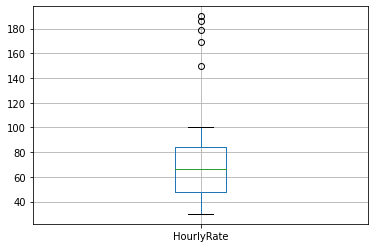

In [66]:
b_plot = data.boxplot(column = ['HourlyRate']) 

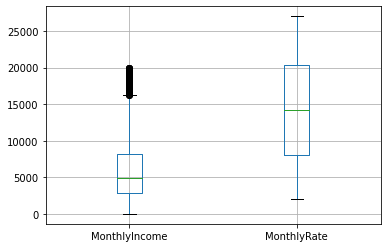

In [67]:
b_plot = data.boxplot(column = ['MonthlyIncome', 'MonthlyRate']) 

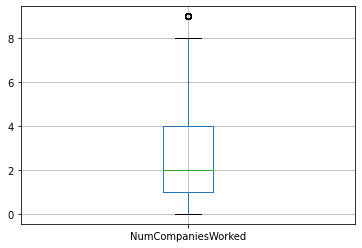

In [68]:
b_plot = data.boxplot(column = ['NumCompaniesWorked']) 

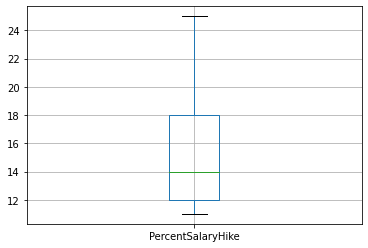

In [69]:
b_plot = data.boxplot(column = ['PercentSalaryHike']) 

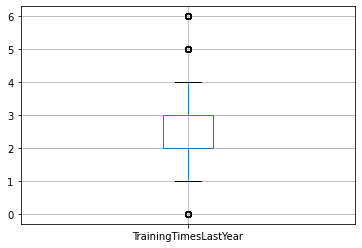

In [70]:
b_plot = data.boxplot(column = ['TrainingTimesLastYear'])

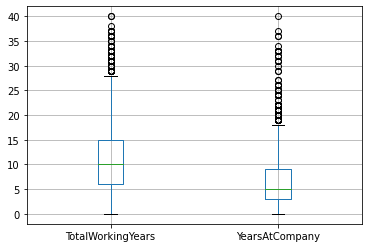

In [72]:
b_plot = data.boxplot(column = ['TotalWorkingYears', 'YearsAtCompany']) 

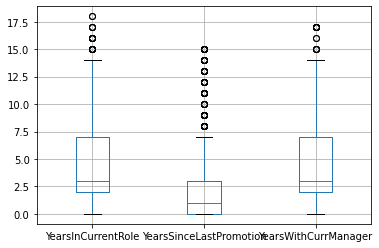

In [73]:
b_plot = data.boxplot(column = ['YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']) 

## 2.3 Analisis multivariado

Para el analisis multivariado estudiaremos la relacion de la variable de interes JobSatisfaction con todas las otras variables.

In [74]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,1.000000,-0.005921,0.033041,-0.000678,-0.010619,-0.009773,-0.071723,-0.014026,-0.004167,-0.010461,-0.008019,-0.056671,0.012828,-0.003696,-0.006297,0.001223,-0.021613,0.001689,-0.022694,-0.003722,-0.003484,-0.017950,-0.024450
Age,-0.005921,1.000000,0.015816,-0.017248,0.198179,0.005294,0.014485,0.026273,0.510167,0.499754,0.030247,0.300515,0.003423,0.000237,0.055441,0.038821,0.676272,-0.020346,-0.014983,0.314011,0.216205,0.217855,0.202293
DailyRate,0.033041,0.015816,1.000000,-0.001937,-0.020092,0.024917,0.036966,0.037402,-0.000552,0.006865,-0.026418,0.034036,0.020542,-0.000696,0.008011,0.042150,0.013335,-0.000848,-0.043343,-0.038491,0.009090,-0.035123,-0.033456
DistanceFromHome,-0.000678,-0.017248,-0.001937,1.000000,0.005601,-0.013389,0.013646,0.001217,-0.000993,-0.022514,0.025197,-0.033622,0.048587,0.033069,-0.001525,0.049665,-0.006519,-0.038545,-0.026106,0.004826,0.014514,0.004695,0.012686
Education,-0.010619,0.198179,-0.020092,0.005601,1.000000,-0.018804,0.011215,0.031655,0.107211,0.100321,-0.017066,0.132503,-0.010521,-0.027238,-0.007131,0.013622,0.150403,-0.025955,0.021927,0.073056,0.064206,0.052343,0.071668
EnvironmentSatisfaction,-0.009773,0.005294,0.024917,-0.013389,-0.018804,1.000000,-0.063689,-0.001455,0.004102,-0.005454,0.035536,0.013212,-0.029518,-0.025930,0.005326,0.005551,-0.001819,-0.013416,0.033973,0.000921,0.022953,0.016657,-0.004657
HourlyRate,-0.071723,0.014485,0.036966,0.013646,0.011215,-0.063689,1.000000,0.047155,-0.046795,-0.035262,-0.014925,0.010618,-0.009038,-0.001142,0.002016,0.052461,-0.021064,0.004898,-0.009598,-0.033059,-0.034605,-0.030752,-0.038323
JobInvolvement,-0.014026,0.026273,0.037402,0.001217,0.031655,-0.001455,0.047155,1.000000,-0.015503,-0.017243,-0.012270,0.021481,-0.016665,-0.027493,0.038142,0.026093,-0.012133,-0.012279,-0.022263,-0.029554,0.004950,-0.029832,0.018113
JobLevel,-0.004167,0.510167,-0.000552,-0.000993,0.107211,0.004102,-0.046795,-0.015503,1.000000,0.950424,0.043836,0.142462,-0.026724,-0.017950,0.022812,0.013473,0.783477,-0.023978,0.037209,0.540206,0.398933,0.356658,0.381067
MonthlyIncome,-0.010461,0.499754,0.006865,-0.022514,0.100321,-0.005454,-0.035262,-0.017243,0.950424,1.000000,0.037212,0.147094,-0.021095,-0.015570,0.027704,0.008207,0.773697,-0.028745,0.029681,0.522661,0.376343,0.350225,0.353299


### 2.3.1 JobSatisfaction vs Variables Categoricas

- Attrition

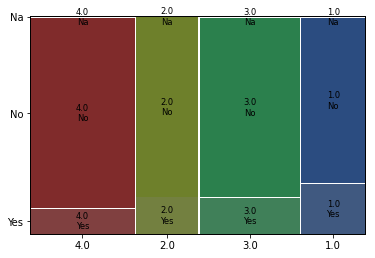

In [77]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data=data, index=['JobSatisfaction', 'Attrition'])
plt.show()

- BusinessTravel

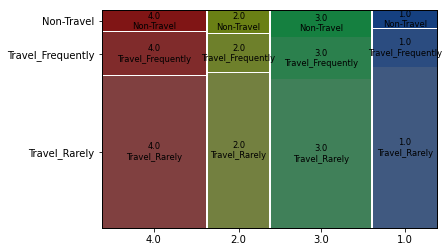

In [78]:
mosaic(data=data, index=['JobSatisfaction', 'BusinessTravel'])
plt.show()

- Department

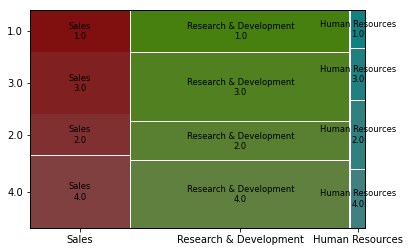

In [80]:
mosaic(data=data, index=['Department', 'JobSatisfaction'])
plt.show()

- EducationField

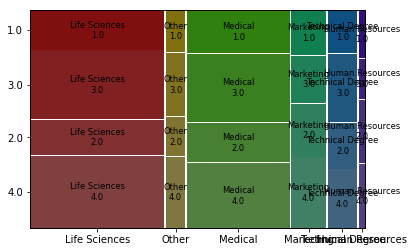

In [81]:
mosaic(data=data, index=['EducationField', 'JobSatisfaction'])
plt.show()

- Gender

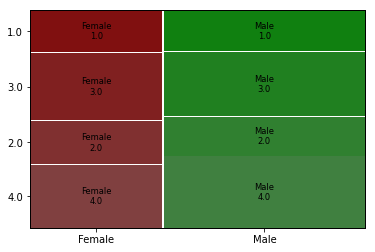

In [82]:
mosaic(data=data, index=['Gender', 'JobSatisfaction'])
plt.show()

- JobRole

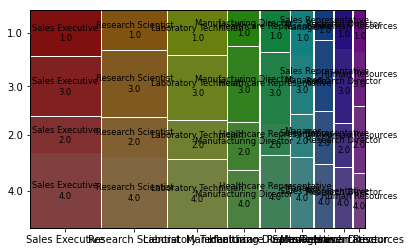

In [83]:
mosaic(data=data, index=['JobRole', 'JobSatisfaction'])
plt.show()

- MaritalStatus

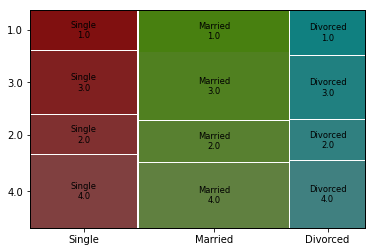

In [84]:
mosaic(data=data, index=['MaritalStatus', 'JobSatisfaction'])
plt.show()

- OverTime

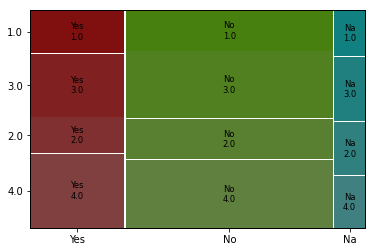

In [85]:
mosaic(data=data, index=['OverTime', 'JobSatisfaction'])
plt.show()

- Education

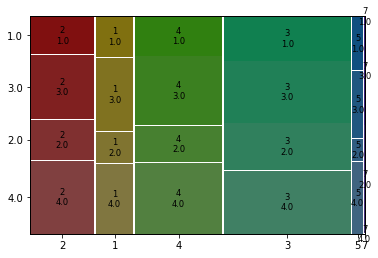

In [86]:
mosaic(data=data, index=['Education', 'JobSatisfaction'])
plt.show()

- EnvironmentSatisfaction

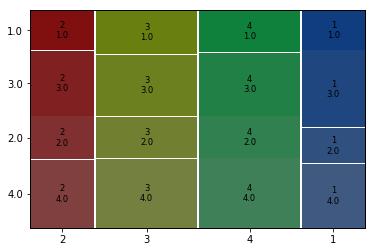

In [87]:
mosaic(data=data, index=['EnvironmentSatisfaction', 'JobSatisfaction'])
plt.show()

- JobInvolvement


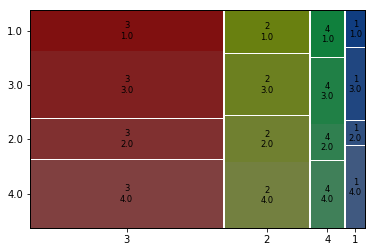

In [88]:
mosaic(data=data, index=['JobInvolvement', 'JobSatisfaction'])
plt.show()

- JobLevel


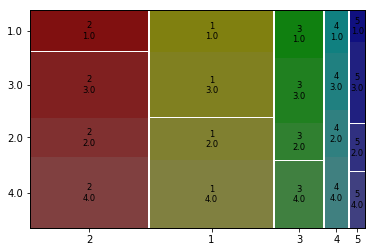

In [89]:
mosaic(data=data, index=['JobLevel', 'JobSatisfaction'])
plt.show()

- PerformanceRating


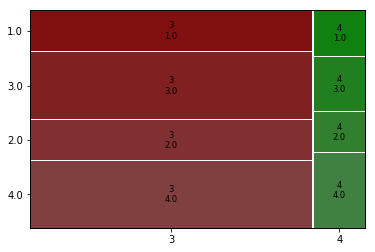

In [90]:
mosaic(data=data, index=['PerformanceRating', 'JobSatisfaction'])
plt.show()

- RelationshipSatisfaction


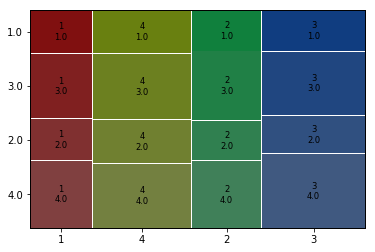

In [91]:
mosaic(data=data, index=['RelationshipSatisfaction', 'JobSatisfaction'])
plt.show()

- StockOptionLevel


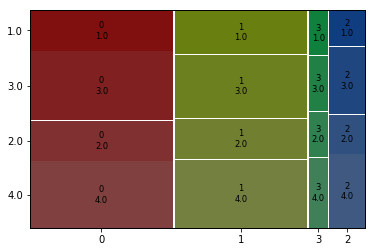

In [92]:
mosaic(data=data, index=['StockOptionLevel', 'JobSatisfaction'])
plt.show()

- WorkLifeBalance

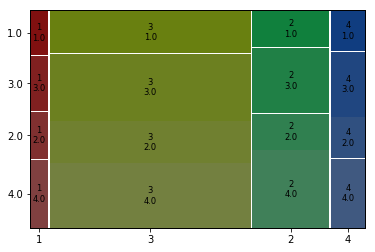

In [93]:
mosaic(data=data, index=['WorkLifeBalance', 'JobSatisfaction'])
plt.show()

### 2.3.2 JobSatisfaction vs Variables Numericas continuas

- Age  

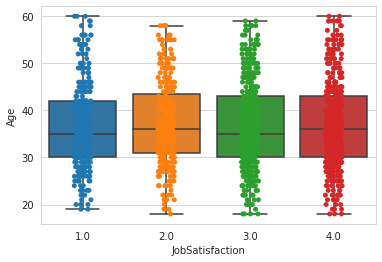

In [94]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='Age',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="Age",data= data)

- DailyRate


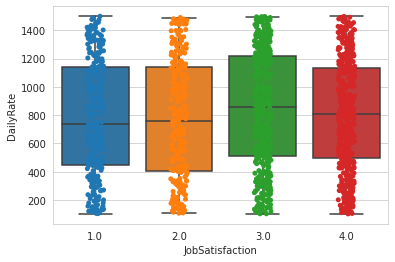

In [95]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='DailyRate',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="DailyRate",data= data)

- DistanceFromHome


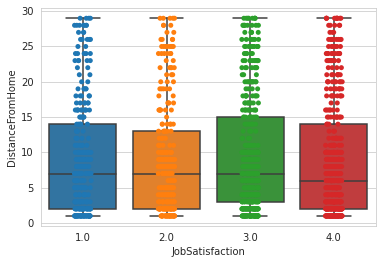

In [98]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='DistanceFromHome',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="DistanceFromHome",data= data)

- HourlyRate


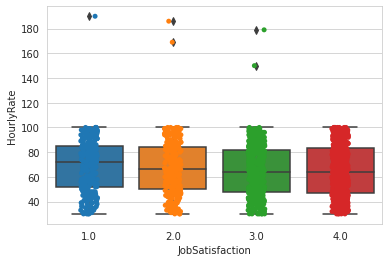

In [99]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='HourlyRate',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="HourlyRate",data= data)

- MonthlyIncome


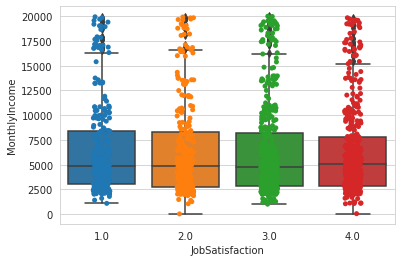

In [100]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='MonthlyIncome',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="MonthlyIncome",data= data)

- MonthlyRate


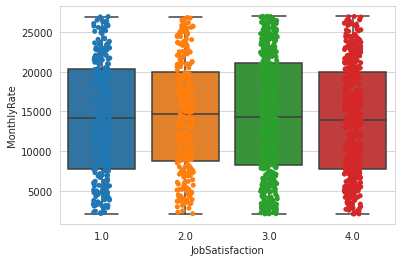

In [101]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='MonthlyRate',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="MonthlyRate",data= data)

- NumCompaniesWorked


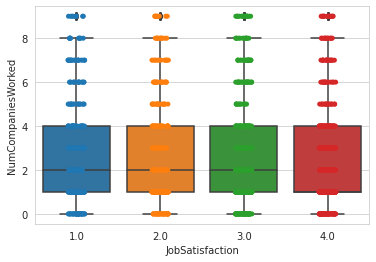

In [102]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='NumCompaniesWorked',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="NumCompaniesWorked",data= data)

- PercentSalaryHike


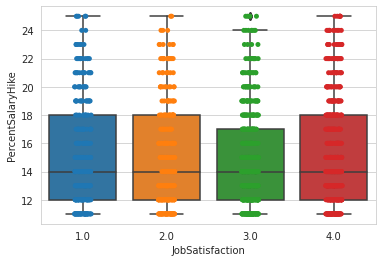

In [103]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='PercentSalaryHike',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="PercentSalaryHike",data= data)

- TotalWorkingYears


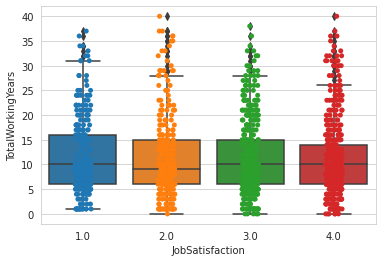

In [104]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='TotalWorkingYears',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="TotalWorkingYears",data= data)

- TrainingTimesLastYear


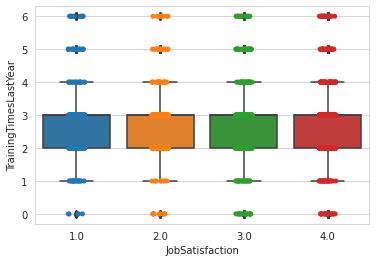

In [105]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='TrainingTimesLastYear',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="TrainingTimesLastYear",data= data)

- YearsAtCompany


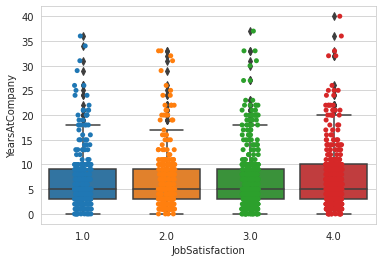

In [106]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsAtCompany',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsAtCompany",data= data)

- YearsInCurrentRole


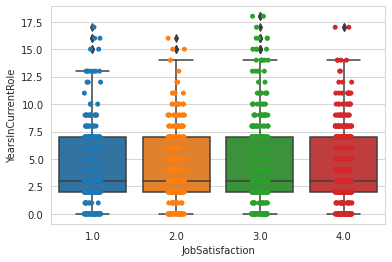

In [107]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsInCurrentRole',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsInCurrentRole",data= data)

- YearsSinceLastPromotion


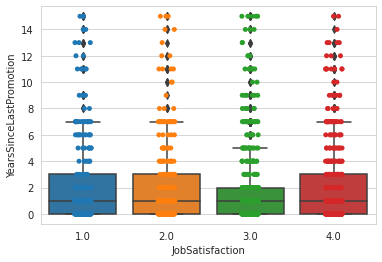

In [108]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsSinceLastPromotion',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsSinceLastPromotion",data= data)

- YearsWithCurrManager   

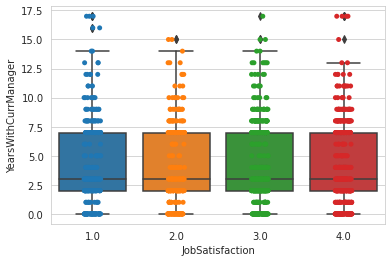

In [109]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='JobSatisfaction',y='YearsWithCurrManager',data= data)
ax = sns.stripplot(x="JobSatisfaction", y="YearsWithCurrManager",data= data)

## 2.4 Conclusiones del analisis

No hay dimensiones que afecten de una manera clara y significativa la variable objetivo, por lo que la mejor manera de hacer seleccion de features es usar terminos de regularizacion sobre los modelos, como Lasso en caso de una regresion logistica. De esta manera cada algoritmo seleccionara las variables que afecten su rendimiento de manera mas favorable

# 3. Preparacion del modelo

Paso 1: convertir las variables categoricas-cualitativas a numericas a traves de un one-hot.
- Attrition
- BusinessTravel
- Department
- EducationField
- Gender
- JobRole
- MaritalStatus
- OverTime

In [110]:
data_main = data.copy()
data_main

,JobSatisfaction,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,4.0,41.000000,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6.0,4,0,5
1,2.0,49.000000,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10.0,7,1,7
2,3.0,37.000000,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0.0,0,0,0
3,3.0,33.000000,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8.0,7,3,0
4,2.0,37.078471,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.000000,No,Non-Travel,845,Sales,1,5,Medical,4,...,3,2,0,7,6,3,1.0,0,0,0
1502,2.0,49.000000,No,Travel_Rarely,174,Sales,8,4,Technical Degree,4,...,3,2,1,22,3,3,9.0,8,2,3
1503,1.0,27.000000,No,Travel_Rarely,1302,Research & Development,19,3,Other,4,...,3,1,2,7,3,3,7.0,7,0,7
1504,2.0,44.000000,Yes,Travel_Frequently,429,Research & Development,1,2,Medical,3,...,3,3,3,6,2,2,5.0,3,2,3


In [111]:
y = pd.get_dummies(data_main.Attrition, prefix='Attrition')
z = pd.get_dummies(data_main.BusinessTravel, prefix='BusinessTravel')
f = pd.get_dummies(data_main.Department, prefix='Department')
x = pd.get_dummies(data_main.EducationField, prefix='EducationField')
w = pd.get_dummies(data_main.Gender, prefix='Gender')
a = pd.get_dummies(data_main.JobRole, prefix='JobRole')
b = pd.get_dummies(data_main.MaritalStatus, prefix='MaritalStatus')
c = pd.get_dummies(data_main.OverTime, prefix='OverTime')
print(y.head())

   Attrition_Na  Attrition_No  Attrition_Yes
0             0             0              1
1             0             1              0
2             0             0              1
3             0             1              0
4             0             1              0


In [112]:
data_main =  data_main.join(y).drop(columns=['Attrition'])
data_main =  data_main.join(z).drop(columns=['BusinessTravel'])
data_main =  data_main.join(f).drop(columns=['Department'])
data_main =  data_main.join(x).drop(columns=['EducationField'])
data_main =  data_main.join(w).drop(columns=['Gender'])
data_main =  data_main.join(a).drop(columns=['JobRole'])
data_main =  data_main.join(b).drop(columns=['MaritalStatus'])
data_main =  data_main.join(c).drop(columns=['OverTime'])
data_main

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
0,4.0,41.000000,1102,1,2,2,94,3,2,5993.0,...,0,0,1,0,0,0,1,0,0,1
1,2.0,49.000000,279,8,1,3,61,2,2,5130.0,...,0,1,0,0,0,1,0,0,1,0
2,3.0,37.000000,1373,2,2,4,92,2,1,2090.0,...,0,0,0,0,0,0,1,0,0,1
3,3.0,33.000000,1392,3,4,4,56,3,1,2909.0,...,0,1,0,0,0,1,0,0,0,1
4,2.0,37.078471,591,2,1,1,40,3,1,3468.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,4.0,36.000000,845,1,5,4,45,3,2,6653.0,...,0,0,1,0,0,0,1,0,1,0
1502,2.0,49.000000,174,8,4,4,56,2,4,13120.0,...,0,0,1,0,0,1,0,0,1,0
1503,1.0,27.000000,1302,19,3,4,67,2,1,4066.0,...,0,0,0,0,1,0,0,0,1,0
1504,2.0,44.000000,429,1,2,3,99,3,1,2342.0,...,0,1,0,0,1,0,0,0,0,1


In [125]:
ProfileReport(data_main)

Output hidden; open in https://colab.research.google.com to view.

Paso 2: dividir test y training

In [114]:
train, test = train_test_split(data_main, test_size=0.2, random_state=33)
train.head()

,JobSatisfaction,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
932,3.0,29.0,806,7,3,2,39,3,1,3339.0,...,0,0,0,0,1,0,0,0,0,1
788,3.0,28.0,857,10,3,3,59,3,2,3660.0,...,0,1,0,0,0,0,1,0,1,0
150,2.0,40.0,1395,26,3,2,54,3,2,5605.0,...,0,1,0,0,1,0,0,0,1,0
1401,2.0,55.0,189,26,4,3,71,4,5,19636.0,...,0,0,0,0,0,1,0,0,0,1
174,1.0,45.0,1268,4,2,3,30,3,2,5006.0,...,0,0,1,0,1,0,0,0,0,1


In [115]:
X_train, y_train = train.drop(['JobSatisfaction'],axis=1), train['JobSatisfaction'] 
display(X_train)
y_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
932,29.0,806,7,3,2,39,3,1,3339.0,17285,...,0,0,0,0,1,0,0,0,0,1
788,28.0,857,10,3,3,59,3,2,3660.0,7909,...,0,1,0,0,0,0,1,0,1,0
150,40.0,1395,26,3,2,54,3,2,5605.0,8504,...,0,1,0,0,1,0,0,0,1,0
1401,55.0,189,26,4,3,71,4,5,19636.0,25811,...,0,0,0,0,0,1,0,0,0,1
174,45.0,1268,4,2,3,30,3,2,5006.0,6319,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,36.0,1456,13,5,2,96,2,2,6134.0,8658,...,0,0,1,0,1,0,0,0,0,1
663,21.0,1427,18,1,4,65,3,1,2693.0,8870,...,0,1,0,0,0,0,1,0,1,0
582,40.0,791,2,2,3,38,4,2,4244.0,9931,...,0,0,0,0,0,1,0,0,1,0
395,43.0,313,21,3,4,61,3,1,2258.0,15238,...,0,0,0,0,0,1,0,0,1,0


932     3.0
788     3.0
150     2.0
1401    2.0
174     1.0
       ... 
1236    1.0
663     4.0
582     2.0
395     4.0
1054    2.0
Name: JobSatisfaction, Length: 1195, dtype: float64

In [116]:
X_test, y_test = test.drop(['JobSatisfaction'],axis=1), test['JobSatisfaction'] 
display(X_test)
y_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Na,OverTime_No,OverTime_Yes
1450,35.0,1146,26,4,3,31,3,3,8837.0,16642,...,0,0,0,0,0,0,1,0,0,1
549,34.0,970,8,2,2,96,3,2,6142.0,7360,...,0,0,0,0,0,0,1,0,1,0
235,43.0,1034,16,3,4,80,3,4,16064.0,7744,...,0,0,0,0,0,1,0,0,0,1
842,28.0,1485,12,1,3,79,3,1,2515.0,22955,...,0,0,0,0,0,1,0,0,0,1
1288,35.0,1180,2,2,2,90,3,2,5762.0,24442,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,30.0,1465,1,3,4,63,3,1,3579.0,9369,...,0,1,0,0,0,1,0,0,0,1
443,22.0,1368,4,1,3,99,2,1,3894.0,9129,...,0,0,0,0,0,0,1,0,1,0
641,32.0,379,5,2,2,48,3,2,6524.0,8891,...,0,0,1,0,0,1,0,0,1,0
1342,34.0,1480,4,3,3,64,3,3,9713.0,24444,...,0,0,1,0,0,1,0,0,0,1


1450    4.0
549     3.0
235     4.0
842     4.0
1288    4.0
       ... 
886     2.0
443     3.0
641     2.0
1342    4.0
493     3.0
Name: JobSatisfaction, Length: 299, dtype: float64

# 4. Implementacion del modelo

## 4.1 Regresión logistica

In [156]:
estimators = [
        ("normalizar", StandardScaler()),
        ('varianceThreshold',VarianceThreshold()),
        ('bestFeatures', SelectKBest(chi2)),
        ('polinomial', PolynomialFeatures(include_bias=False)),
        ('regresion', LogisticRegression())          
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              'varianceThreshold__threshold':[(.9* (1 - .9)),(.8* (1 - .8)),(.7* (1 - .7)),'passthrough'],
              'bestFeatures__k':[2,3,4,5,10,'passthrough'], 
              'polinomial__degree':[2,3,'passthrough'],
              'regresion__penalty': ['l2', 'none']
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [157]:
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py",

ValueError: ignored

In [130]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalizar,param_polinomial__degree,param_regresion__penalty,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.388221,0.031456,0.011530,0.004720,StandardScaler(),2,l2,"{'normalizar': StandardScaler(), 'polinomial__...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.580770,0.045997,0.008474,0.001240,StandardScaler(),2,none,"{'normalizar': StandardScaler(), 'polinomial__...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
2,29.211124,2.560566,0.039129,0.003357,StandardScaler(),3,l2,"{'normalizar': StandardScaler(), 'polinomial__...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,8.719013,1.085817,0.036371,0.003098,StandardScaler(),3,none,"{'normalizar': StandardScaler(), 'polinomial__...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4,0.012499,0.004782,0.000000,0.000000,StandardScaler(),passthrough,l2,"{'normalizar': StandardScaler(), 'polinomial__...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5,0.010902,0.000568,0.000000,0.000000,StandardScaler(),passthrough,none,"{'normalizar': StandardScaler(), 'polinomial__...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
6,1.453716,0.055053,0.009536,0.002104,MinMaxScaler(),2,l2,"{'normalizar': MinMaxScaler(), 'polinomial__de...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,1.684432,0.351690,0.011850,0.005048,MinMaxScaler(),2,none,"{'normalizar': MinMaxScaler(), 'polinomial__de...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
8,25.901395,0.934794,0.040516,0.007163,MinMaxScaler(),3,l2,"{'normalizar': MinMaxScaler(), 'polinomial__de...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,17.385712,0.778351,0.036839,0.008011,MinMaxScaler(),3,none,"{'normalizar': MinMaxScaler(), 'polinomial__de...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [135]:
best_model.classes_

array([1., 2., 3., 4.])

In [136]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       229
         2.0       1.00      1.00      1.00       223
         3.0       1.00      1.00      1.00       352
         4.0       1.00      1.00      1.00       391

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

Test:
              precision    recall  f1-score   support

         1.0       0.16      0.17      0.16        59
         2.0       0.18      0.16      0.17        56
         3.0       0.39      0.31      0.35       102
         4.0       0.32      0.40      0.36        82

    accuracy                           0.28       299
   macro avg       0.26      0.26      0.26       299
weighted avg       0.29      0.28      0.28       299



* Este modelo tiene un overfit muy fuerte

## 4.2 DecisionTreeClassifier

## 4.3 KNeighborsClassifier

In [145]:
estimators = [
        ("normalizar", StandardScaler()),
        ("knn", KNeighborsClassifier()),                  
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(),'passthrough'],
              'knn__n_neighbors':[1,2,3,4,5],
              "knn__algorithm": ["auto",  "ball_tree", "kd_tree", "brute"]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [146]:
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,


{'knn__algorithm': 'auto',
 'knn__n_neighbors': 1,
 'normalizar': StandardScaler()}

In [147]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__n_neighbors,param_normalizar,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012641,0.002365,0.017189,0.004063,auto,1,StandardScaler(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.016839,0.007369,0.017470,0.004981,auto,1,MinMaxScaler(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
2,0.008637,0.005278,0.017331,0.008714,auto,1,passthrough,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
3,0.013427,0.004887,0.015196,0.004315,auto,2,StandardScaler(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
4,0.010946,0.003833,0.013928,0.002525,auto,2,MinMaxScaler(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
5,0.008353,0.004187,0.016944,0.005297,auto,2,passthrough,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
6,0.013794,0.005419,0.015805,0.004798,auto,3,StandardScaler(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
7,0.013996,0.005476,0.018701,0.006594,auto,3,MinMaxScaler(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
8,0.007102,0.002385,0.017813,0.007140,auto,3,passthrough,"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39
9,0.012573,0.003839,0.017404,0.005776,auto,4,StandardScaler(),"{'knn__algorithm': 'auto', 'knn__n_neighbors':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40


In [148]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       229
         2.0       1.00      1.00      1.00       223
         3.0       1.00      1.00      1.00       352
         4.0       1.00      1.00      1.00       391

    accuracy                           1.00      1195
   macro avg       1.00      1.00      1.00      1195
weighted avg       1.00      1.00      1.00      1195

Test:
              precision    recall  f1-score   support

         1.0       0.21      0.22      0.21        59
         2.0       0.16      0.16      0.16        56
         3.0       0.34      0.30      0.32       102
         4.0       0.24      0.27      0.25        82

    accuracy                           0.25       299
   macro avg       0.24      0.24      0.24       299
weighted avg       0.26      0.25      0.25       299



* Este modelo tiene un overfit muy fuerte

## 4.4 SVMClassifier

## 4.5 RandomForestClassifier

In [149]:
estimators = [
        ("normalizar", StandardScaler()),
        ("rfc", RandomForestClassifier()),                  
    ]

pipe = Pipeline(estimators)

parameters = {
              'normalizar': [StandardScaler(), MinMaxScaler(),'passthrough'],
              'rfc__n_estimators': [10, 20, 30, 50, 100, 200],
              'rfc__max_depth': [5, 10, 15, 20, 25, 30],
              'rfc__min_samples_leaf': [2, 4, 6, 8, 10]
              }

grid_search = GridSearchCV(pipe, parameters, verbose=2, scoring='f1', cv=10, n_jobs=-1)

In [150]:
grid_search.fit(X_train,y_train)
best_model = grid_search.best_estimator_
grid_search.best_params_

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

{'normalizar': StandardScaler(),
 'rfc__max_depth': 5,
 'rfc__min_samples_leaf': 2,
 'rfc__n_estimators': 10}

In [151]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalizar,param_rfc__max_depth,param_rfc__min_samples_leaf,param_rfc__n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049902,0.007304,0.007784,0.000939,StandardScaler(),5,2,10,"{'normalizar': StandardScaler(), 'rfc__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.086436,0.010775,0.009333,0.000985,StandardScaler(),5,2,20,"{'normalizar': StandardScaler(), 'rfc__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368
2,0.113699,0.007819,0.011227,0.001294,StandardScaler(),5,2,30,"{'normalizar': StandardScaler(), 'rfc__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367
3,0.177521,0.011801,0.014605,0.000857,StandardScaler(),5,2,50,"{'normalizar': StandardScaler(), 'rfc__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366
4,0.334225,0.008810,0.025021,0.002418,StandardScaler(),5,2,100,"{'normalizar': StandardScaler(), 'rfc__max_dep...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.089002,0.005017,0.010653,0.003307,passthrough,30,10,20,"{'normalizar': 'passthrough', 'rfc__max_depth'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172
536,0.131714,0.005728,0.012105,0.001788,passthrough,30,10,30,"{'normalizar': 'passthrough', 'rfc__max_depth'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171
537,0.205614,0.010977,0.015845,0.002541,passthrough,30,10,50,"{'normalizar': 'passthrough', 'rfc__max_depth'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170
538,0.401650,0.007126,0.028255,0.002495,passthrough,30,10,100,"{'normalizar': 'passthrough', 'rfc__max_depth'...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472


In [152]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Train:")
print(classification_report(y_train,y_pred_train))
print("Test:")
print(classification_report(y_test,y_pred_test))

Train:
              precision    recall  f1-score   support

         1.0       0.72      0.17      0.27       229
         2.0       0.89      0.14      0.24       223
         3.0       0.51      0.57      0.54       352
         4.0       0.46      0.84      0.60       391

    accuracy                           0.50      1195
   macro avg       0.64      0.43      0.41      1195
weighted avg       0.60      0.50      0.45      1195

Test:
              precision    recall  f1-score   support

         1.0       0.33      0.03      0.06        59
         2.0       0.00      0.00      0.00        56
         3.0       0.38      0.41      0.40       102
         4.0       0.26      0.57      0.36        82

    accuracy                           0.30       299
   macro avg       0.24      0.25      0.20       299
weighted avg       0.27      0.30      0.24       299



## 4.6 XGboost Classifier